## Δηλώνουμε τις βιβλιοθήκες που θα χρησιμοποιήσουμε

* numpy: Βιβλιοθήκη χρήσιμη για μαθηματικά και διανύσματα
* pandas: DataFrames (σαν το Microsoft Excel)
* matplotlib: Βιβλιοθήκη για διαγράμματα
* sklearn: Βιβλιοθήκη για Μηχανική Μάθηση ("Machine Learning")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

/home/kmourat/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/kmourat/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kmourat/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kmourat/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/kmourat/venv/lib/python3.6/site-packages/tornado

### Φορτώνουμε τα δεδομένα

In [3]:
digits = load_digits()

# δεδομένα
data = digits.data
# αποτέλεσμα
target = digits.target

print("Αριθμός εικόνων: {}\nΜέγθος εικόνων: {} (8x8 pixel)".format(data.shape[0], data.shape[1]))

Αριθμός εικόνων: 1797
Μέγθος εικόνων: 64 (8x8 pixel)


### Παράδειγμα εικόνας:

<IPython.core.display.Javascript object>


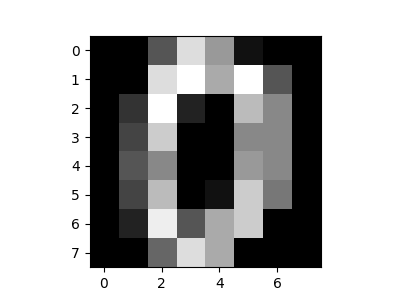

In [4]:
fig = plt.figure(figsize=(4,3))
plt.imshow(data[0].reshape(8,8), cmap="gray");

### Πως βλέπει ο υπολογιστής την εικόνα:

In [5]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Πως καταλαβαίνει ο υπολογιστής ποιες εικόνες "μοιάζουν";

In [6]:
comp = PCA(3)
principal_components = comp.fit_transform(data)

print("Αριθμός εικόνων: {}\nΜέγθος εικόνων: {} (πλέον όχι 8x8 pixel)".format(principal_components.shape[0],
                                                                   principal_components.shape[1]))

Αριθμός εικόνων: 1797
Μέγθος εικόνων: 3 (πλέον όχι 8x8 pixel)


In [7]:
principal_components[0]

array([-1.25946656, 21.27488243, -9.46305628])

In [8]:
# Ορίζουμε ένα χρώμα για τον κάθε αριθμό
colors = {
    0: "red",
    1: "green",
    2: "blue",
    3: "cyan",
    4: "magenta",
    5: "black",
    6: "yellow",
    7: "gold",
    8: "orange",
    9: "olive"
}

<IPython.core.display.Javascript object>


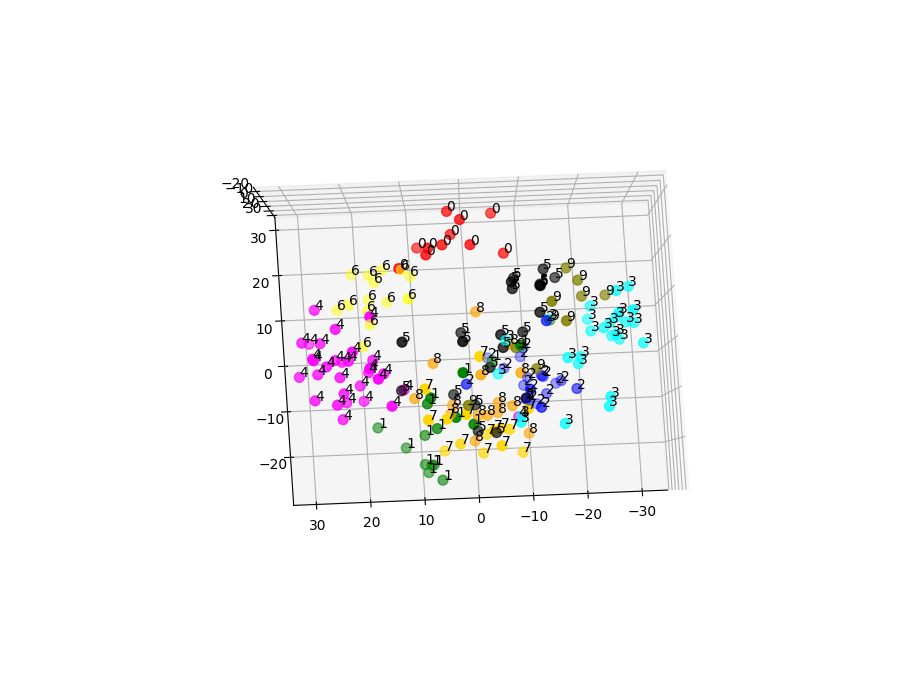

In [9]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

n = 10

ax.scatter(principal_components[::n,0], principal_components[::n,1], principal_components[::n,2],
            c=[colors[t] for t in target[::n]],
            s=50)

for i, _ in enumerate(principal_components[::n,0]):
    ax.text(principal_components[i*n,0],
            principal_components[i*n,1],
            principal_components[i*n,2],
            "{}".format(target[i*n]),
            size=10, zorder=1,);

## Πρόβλεψη !

### Στην τύχη...

In [10]:
random_predictions = np.random.choice(list(range(10)), data.shape[0])

for predicted, true in zip(random_predictions[:5], target[:5]):
    print("Πρόβλεψη: {:>12}\nΠραγματικότητα: {:>6}\n".format(predicted, true))
    
print("Συνολικό ποσοστό επιτυχίας: {:.2f}%".format(100*np.mean(random_predictions==target)))

Πρόβλεψη:            6
Πραγματικότητα:      0

Πρόβλεψη:            6
Πραγματικότητα:      1

Πρόβλεψη:            7
Πραγματικότητα:      2

Πρόβλεψη:            7
Πραγματικότητα:      3

Πρόβλεψη:            7
Πραγματικότητα:      4

Συνολικό ποσοστό επιτυχίας: 8.57%


###  Νευρωνικά Δίκτυα !!

In [11]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Επεξεργασία δεδομένων (πρέπει να έχουν την σωστή μορφή!)

Αντί να έχουμε ένα νούμερο από το 0-9, βολεύει (κυρίως τον υπολογιστή μας) να έχουμε μια λίστα με 10 νούμερα όπου όλα είναι 0, εκτός από το νούμερο στο οποίο αντιστοιχεί στον αριθμό που ψάχνουμε.

#### Παραδείγματα:

    Αριθμός: 7
    Λίστα: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

    Αριθμός: 2
    Λίστα: [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

    Αριθμός: 1
    Λίστα: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

    Αριθμός: 0
    Λίστα: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    Αριθμός: 9
    Λίστα: [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]

In [12]:
# Υπάρχει πιο αποδοτικός τρόπος, αλλά αυτός είναι πιο ευανάγνωστος
# Φτιάχνουμε έναν πίνακα 1797 x 10
target2 = np.zeros((data.shape[0], 10))

for i, number in enumerate(target):
    # γραμμή i, θέση number στην λίστα
    # πχ αν η 3η εικόνα είναι 7, τότε θα 
    # θέσουμε την 7η (ουσιαστικά 8η! γιατί
    # ξεκινάμε από το 0) θέση ίση με 1:
    # [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    target2[i][number] = 1
    
    
print("Το {} έγινε {}".format(target[100], target2[100]))

Το 4 έγινε [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Ορισμός του μοντέλου:

* Γραμμικό (το ένα επίπεδο μετά το άλλο)
* 4 Επίπεδα
    * 1 "εισόδου"
    * 2 "κρυφά"
    * 1 "εξόδου"
* Άλλες παράμετροι:
    * Πως βρίσκει της καλύτερες τιμές (SGD, Adam, κλπ)
    * Πως μετράμε την επίδοση (Εντροπία)
    * Πως παρακολοθούμε την πρόοδο (Ακρίβεια / ποσοστό επιτυχίας)

In [13]:
model = Sequential()

model.add(Dense(100, input_shape=(64,)))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(10, activation="softmax"))

model.compile("SGD", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 27,710
Trainable params: 27,710
Non-trainable params: 0
_________________________________________________________________


In [14]:
h = model.fit(data, target2, epochs=10, validation_split=0.2)

Train on 1437 samples, validate on 360 samples
Epoch 1/10
1437/1437 [==============================] - 1s 908us/step - loss: 4.6101 - acc: 0.6019 - val_loss: 0.8776 - val_acc: 0.8472
Epoch 2/10
1437/1437 [==============================] - 0s 51us/step - loss: 0.2573 - acc: 0.9269 - val_loss: 0.6530 - val_acc: 0.8722
Epoch 3/10
1437/1437 [==============================] - 0s 51us/step - loss: 0.1527 - acc: 0.9520 - val_loss: 0.5992 - val_acc: 0.8806
Epoch 4/10
1437/1437 [==============================] - 0s 50us/step - loss: 0.1025 - acc: 0.9631 - val_loss: 0.5468 - val_acc: 0.8889
Epoch 5/10
1437/1437 [==============================] - 0s 50us/step - loss: 0.0714 - acc: 0.9736 - val_loss: 0.5971 - val_acc: 0.8833
Epoch 6/10
1437/1437 [==============================] - 0s 47us/step - loss: 0.0469 - acc: 0.9875 - val_loss: 0.5806 - val_acc: 0.8917
Epoch 7/10
1437/1437 [==============================] - 0s 48us/step - loss: 0.0440 - acc: 0.9875 - val_loss: 0.5600 - val_acc: 0.8944
Epoch 8

<IPython.core.display.Javascript object>


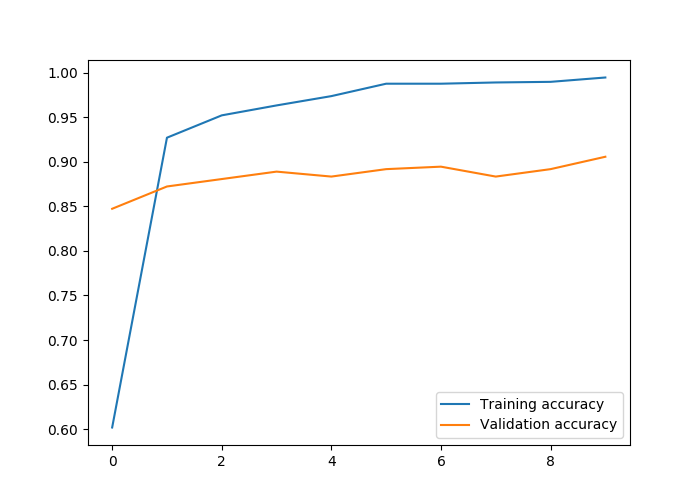

In [15]:
fig = plt.figure(figsize=(7,5))
plt.plot(h.history["acc"], label="Training accuracy")
plt.plot(h.history["val_acc"], label="Validation accuracy")
plt.legend();

<IPython.core.display.Javascript object>


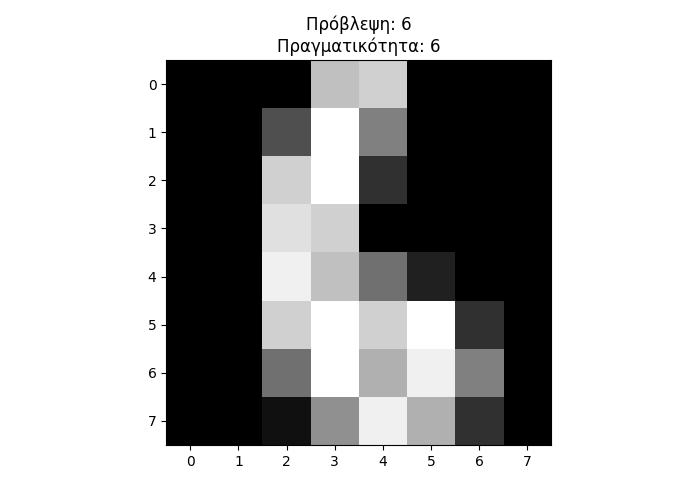

In [17]:
prediction = np.argmax(model.predict(data[6].reshape((1,-1))))

fig = plt.figure(figsize=(7,5))
plt.title("Πρόβλεψη: {}\nΠραγματικότητα: {}".format(prediction, target[6]))
plt.imshow(data[6].reshape((8,8)), cmap="gray")